## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import random

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0,20,50)

In [3]:
np.random.shuffle(X)

In [4]:
y = -2*X + 1

In [5]:

alpha = 0.0001

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [6]:
def Stochastic_GD(X,y,alpha,Max_iter):
    _J , _Theta0 , _Theta1 , epoch_J = [] , [] , [] , [] 
    Theta0 = Theta1 = 0
    for i in range(Max_iter):
        for r,j in enumerate(X):
            Hypothesis = Theta0 + (Theta1 * j)
            J =(1/2) * (Hypothesis - y[r])**2
            _J.append(J)
            grad_theta0 =  (Hypothesis - y[r])
            grad_theta1 =  (Hypothesis-y[r]) * j
            Theta0 -= (alpha * grad_theta0)
            _Theta0.append(Theta0)
            Theta1 -= (alpha * grad_theta1) 
            _Theta1.append(Theta1)
        
        # Stopping Condition 
        epoch_J.append(J)
        if ((i > 3) and (epoch_J[-1] - epoch_J[-2] < 0.001)):
            return _Theta0 , _Theta1 , _J , Theta0 , Theta1
    return _Theta0 , _Theta1 , _J , Theta0 , Theta1
            
    

#### Try your function with any input parameterss of your choice.

In [7]:
_Theta0,_Theta1,_J,Theta0,Theta1 = Stochastic_GD(X,y,0.001,1000)

In [8]:
Theta0

-0.07395131874779619

In [9]:
Theta1

-1.9279241479385194

In [10]:
Y_hat = Theta0 + ( Theta1 * X)

#### Calculate r2 score

In [11]:
from sklearn.metrics import r2_score
r2_score(y, Y_hat)

0.9978023689932856

#### Plot loss vs. epochs

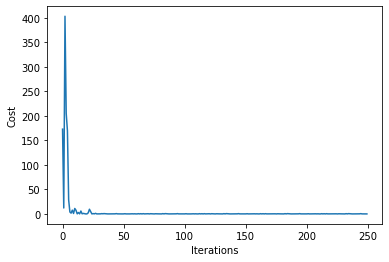

In [12]:
plt.plot(_J)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

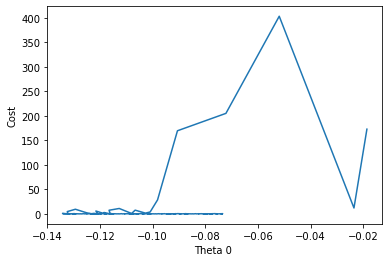

In [13]:
plt.plot(_Theta0,_J)
plt.xlabel('Theta 0 ')
plt.ylabel('Cost')
plt.show()

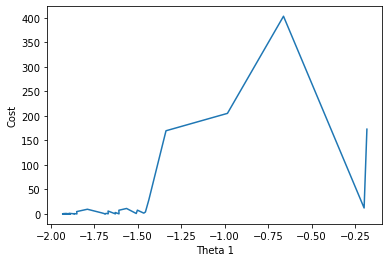

In [14]:
plt.plot(_Theta1,_J)
plt.xlabel('Theta 1')
plt.ylabel('Cost')
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

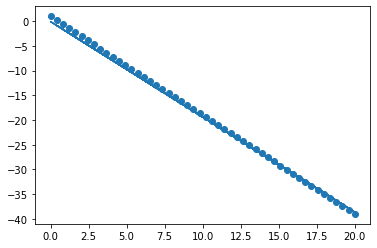

In [14]:
plt.scatter(X,y)
plt.plot(X,Y_hat)
plt.show()

## MiniBatch implementation 


In [16]:
def MiniBatch_GD(X,y,alpha,Max_iter,batch_size):
    X = [X[x:x+batch_size] for x in range(0, len(X), batch_size)]
    y = [y[Y:Y+batch_size] for Y in range(0, len(y), batch_size)]
    _J , _Theta0 , _Theta1 , epoch_J = [] , [] , [] , []
    Theta0 = Theta1 = 0
    for i in range(Max_iter):
        for j in range(len(X)):
            Hypothesis = Theta0 + (Theta1 * X[j])
            J =(1/(2*(batch_size))) * np.sum((Hypothesis - y[j])**2)
            _J.append(J)
            grad_theta0 = (1/batch_size) * np.sum(Hypothesis - y[j])
            grad_theta1 = (1/batch_size) * np.dot(Hypothesis-y[j],X[j])
            Theta0 -= (alpha * grad_theta0)
            _Theta0.append(Theta0)
            Theta1 -= (alpha * grad_theta1)
            _Theta1.append(Theta1)
        epoch_J.append(J)
        print(i)
        if ((i > 3) and (epoch_J[-1] - epoch_J[-2] < 0.0001)):
            return _Theta0 , _Theta1 , _J , Theta0 , Theta1
    return _Theta0 , _Theta1 , _J , Theta0 , Theta1

In [17]:
_Theta0,_Theta1,_J,Theta0,Theta1 = MiniBatch_GD(X,y,0.001,1000,5)

0
1
2
3
4


In [71]:
def MiniBatch_GD(X,y,alpha,Max_iter,batch_size):
    X = [X[x:x+batch_size] for x in range(0, len(X), batch_size)]
    y = [y[Y:Y+batch_size] for Y in range(0, len(y), batch_size)]
    _J , _Theta0 , _Theta1 , epoch_J = [] , [] , [] , []
    Theta0 = Theta1 = 0
    for i in range(Max_iter):
        for j in range(len(X)):
            Hypothesis = Theta0 + (Theta1 * X[j])
            J =(1/(2*(batch_size))) * np.sum((Hypothesis - y[j])**2)
            _J.append(J)
            grad_theta0 = (1/batch_size) * np.sum(Hypothesis - y[j])
            grad_theta1 = (1/batch_size) * np.sum(np.dot(Hypothesis-y[j],X[j]))
            Theta0 -= ((alpha/batch_size) * np.sum(Hypothesis - y[j]))
            _Theta0.append(Theta0)
            Theta1 -= ((alpha/batch_size) * np.sum(np.dot(Hypothesis-y[j],X[j])))
            _Theta1.append(Theta1)
        epoch_J.append(J)
        if ((i > 3) and (epoch_J[-1] - epoch_J[-2] < 0.0001)):
            return _Theta0 , _Theta1 , _J , Theta0 , Theta1
    return _Theta0 , _Theta1 , _J , Theta0 , Theta1

In [93]:
_Theta0,_Theta1,_J,Theta0,Theta1 = MiniBatch_GD(X,y,0.001,1000,5)

0
1
2
3
4
5
6


In [18]:
Theta0

-0.13003917155645164

In [19]:
Theta1

-1.9173972415797047

In [20]:
Y_hat = Theta0 + ( Theta1 * X)

In [21]:
from sklearn.metrics import r2_score
r2_score(y, Y_hat)

0.9976282064846022

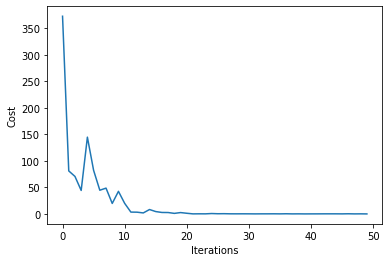

In [22]:
plt.plot(_J)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

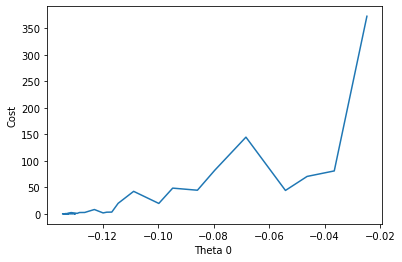

In [23]:
plt.plot(_Theta0,_J)
plt.xlabel('Theta 0 ')
plt.ylabel('Cost')
plt.show()

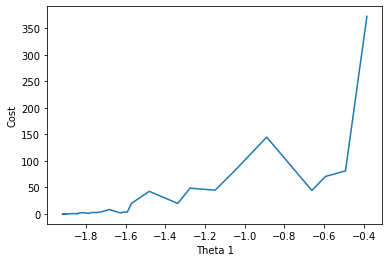

In [24]:
plt.plot(_Theta1,_J)
plt.xlabel('Theta 1')
plt.ylabel('Cost')
plt.show()